# Справочник класса DataSamples
## Создание экземпляра класса

In [1]:
import pandas as pd
from vtb_scorekit.data import DataSamples

df = pd.read_csv('data/train_titanic.csv')
ds = DataSamples(samples={'train': df},          # выборка для разработки. Задается в виде словаря {название_сэмпла: датафрейм}, может содержать любое кол-во сэмплов
                 target='Survived',              # целевая переменная
                 id_column='PassengerId',        # уникальный в рамках среза айди наблюдения
                 result_folder='titanic_output', # папка, в которую будут сохраняться все результаты работы с этим ДатаСэмплом
                 feature_descriptions=pd.read_excel('data/titanic_description.xlsx', index_col=0),  # датафрейм с описанием переменных. Должен содержать индекс с названием переменных и любое кол-во полей с описанием, которые будут подтягиваться в отчеты
                 features=None,                  # список переменных. При None берутся все поля числового типа и нечисловые (кроме target, time_column, id_column) с кол-вом уникльных значений меньше min_nunique
                 cat_columns=None,               # список категориальных переменных. При None категориальными считаются все переменные с кол-вом уникальных значений меньше min_nunique
                 min_nunique=30,                 # кол-во уникальных значений, до которого переменная считается категориальной при автоматическом определении
                 time_column=None,               # дата среза
                 train_name=None,                # название сэмпла обучающей выборки. При None берется первый сэмпл
                 special_bins=None,              # словарь вида {название бина: значение}, каждое из значений которого помещается в отдельный бин
                 n_jobs=1,                       # кол-во используемых рабочих процессов, при -1 берется число, равное CPU_LIMIT
                 random_state=0,                 # сид для генератора случайных чисел, используется во всех остальных методах, где необходимо
                 samples_split=None,             # словарь с параметрами для вызова метода self.samples_split
                 bootstrap_split=None,           # словарь с параметрами для вызова метода self.bootstrap_split
                 verbose=True,                   # флаг вывода комментариев в процессе создания ДатаСэмпла
                 logger=20                       # либо объект logging.Logger, либо числовое значение уровня логгирования:
                                                 #      10 - выводятся все сообщения с типами debug, info, warning, error
                                                 #      20 - выводятся все сообщения с типами info, warning, error
                                                 #      30 - выводятся все сообщения с типами warning, error
                                                 #      40 - выводятся сообщения только с типом error
                                                 #      50 - не выводятся никакие сообщения
                 )

[INFO] [2023-06-20 13:15:17] ---------------------------------------------------------------- Creating DataSamples ----------------------------------------------------------------
[INFO] [2023-06-20 13:15:17] Selected 7 features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
[INFO] [2023-06-20 13:15:17] Selected 5 categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
[INFO] [2023-06-20 13:15:17] DataSamples stats:
             train
amount         891
target         342
target_rate  0.384
period          NA


## 1. Переменные

In [2]:
# целевая переменная
ds.target 

'Survived'

In [3]:
# список переменных
ds.features 

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [4]:
# список категориальных переменных
ds.cat_columns 

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [5]:
# уникальный в рамках среза айди наблюдения
ds.id_column 

'PassengerId'

In [6]:
# дата среза
ds.time_column 

In [7]:
# название сэмпла обучающей выборки
ds.train_name

'train'

In [8]:
# выборка для разработки. Словарь вида {название_сэмпла: датафрейм}
ds.samples
# выборка трэйн
ds.samples[ds.train_name]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C


In [9]:
# датафрейм с описанием переменных
ds.feature_descriptions 

,Описание переменной
feature,
Pclass,Класс пассажира
Sex,Пол
Age,Возраст
SibSp,Кол-во братьев и супругов на борту
Parch,Кол-во родителей и детей на борту
Fare,Плата за проезд
Embarked,Порт посадки


In [10]:
# папка, в которую будут сохраняться все результаты работы с этим ДатаСэмплом
ds.result_folder 

'titanic_output/'

In [11]:
# словарь вида {название бина: значение}, каждое из значений которого помещается в отдельный бин
ds.special_bins 

{}

In [12]:
# датафрейм, основа для нарезания подвыборок
ds.bootstrap_base 

In [13]:
# кол-во используемых рабочих процессов
ds.n_jobs 

1

In [14]:
# максимальный размер очереди для процессов
ds.max_queue 

2

In [15]:
# сид для генератора случайных чисел, используется во всех остальных методах, где необходимо
ds.random_state 

0

In [16]:
# объект logging.Logger для логирования
ds.logger

<RootLogger root (INFO)>

## 2. Методы

In [17]:
"""
Разбивает датафрейма на сэмплы.
При split_type:
     'oos' - создаются сэмплы 'Test' и 'Validate' (при validate_size > 0),
     'oot' - создается сэмпл 'Test oot'
остальные сэмплы не затрагиваются
:param df: датафрейм из которого нарезаются сэмплы. При None берется self.samples[self.train_name]
:param test_size: размер сэмпла test
:param validate_size: размер сэмпла validate
:param split_type: тип разбиения 'oos' = 'out-of-sample', 'oot' = 'out-of-time'
:param stratify: Применимо только для split_type='oos', может принимать значения:
                     False - не проводить стратификацию
                     True - стратификация по целевой переменной
                     list - список полей, по которым будет выполнена стратификация при сплите
:param id_column: название поля с айди. Если задано, то все одинаковые айди распределяются в один сэмпл,
                  в случае split_type='oot' из теста исключаются айди, попавшие в трэйне. Размер теста при этом может стать сильно меньше test_size
"""
ds.samples_split(df=None, test_size=.3, validate_size=0, split_type='oos', stratify=True, id_column=None)

[INFO] [2023-06-20 13:15:18] Actual parts of samples after samples split:
      train   Test
part  0.699  0.301


In [18]:
"""
Создание подвыборок для бутстрэпа
:param df: датафрейм, основа для нарезания подвыборок, при None используется self.samples[self.train_name]
:param bootstrap_part: размер каждой подвыборки
:param bootstrap_number: кол-во подвыборок
:param stratify: стратификация каждой подвыборки по целевой переменной
:param replace: разрешается ли повторять каждое наблюдение множество раз в подвыборке
"""
ds.bootstrap_split(df=None, bootstrap_part=1, bootstrap_number=100, stratify=True, replace=True)

[INFO] [2023-06-20 13:15:18] 100 bootstrap samples with 623 observation each and 0.3836 mean target rate were created


In [19]:
"""
Конвертирование ДатаСэмпла в датафрейм
:param sample_field: добавляемое поле, в которое будет записано название сэмплов

:return: датафрейм
"""
ds.to_df(sample_field='sample')        

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sample
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.775,NaN,S,train
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.662,NaN,S,train
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.100,NaN,S,train
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.000,NaN,C,train
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.000,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.829,NaN,Q,Test
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.662,NaN,S,Test
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.288,E25,S,Test
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.050,NaN,S,Test


In [20]:
"""
Вычисление статистики по сэмплам
:param out: название эксель файла для сохранения статистики
:param gini_in_time: флаг для расчета динамики джини по срезам. На больших выборках с бутстрэпом может занимать много времени
:param targettrend: название папки и листа в файле для сохранения графиков TargetTrend. При None TargetTrend не считается
:param stratify: список полей, по которым проводилась стратификация. Используется для проверки качества стратификации
:param test_size: заданный размер тестовой выборки. Используется для проверки качества стратификации
"""
ds.stats(out=None, gini_in_time=True, targettrend=None)

[INFO] [2023-06-20 13:15:18] DataSamples stats:
             train   Test Bootstrap base
amount         623    268            623
target         239    103            239
target_rate  0.384  0.384          0.384
period          NA     NA             NA


In [21]:
"""
Вычисление джини всех переменных
:param samples: список названий сэмплов для расчета. При None вычисляется на всех доступных сэмпплах
:param features: список переменных для расчета. При None берется self.features
:param fillna: значение для заполнения пропусков. При None пропуски не заполняются
:param add_description: флаг для добавления в датафрейм описания перемнных из self.feature_descriptions
:param abs: возвращать абсолютные значения джини
:param prebinning: выполнить пребиннинг переменных перед вычислением джини

:return: датафрейм с джини
"""
ds.calc_gini(samples=None, features=None, fillna=None, add_description=False, abs=False, prebinning=False)

,train,Test,Bootstrap mean,Bootstrap std
Pclass,37.67,32.95,37.10,4.44
Sex,0.00,0.00,0.00,0.00
Age,0.00,0.00,0.00,0.00
SibSp,-8.13,-9.86,-7.91,3.81
Parch,-13.06,-10.35,-12.88,3.46
Fare,-39.68,-34.81,-38.78,4.56
Embarked,0.00,0.00,0.00,0.00


In [22]:
"""
Вычисление динамики джини по срезам для всех переменных
Доступно только если задано значение self.time_column
:param features: писок переменных для расчета. При None берется self.features
:param fillna: значение для заполнения пропусков. При None пропуски не заполняются
:param ds_aux: вспомогательный ДатаСэмпл с полем среза
:param abs: возвращать абсолютные значения джини
:param prebinning: выполнить пребиннинг переменных перед вычислением джини

:return: датафрейм с джини
"""
ds.calc_gini_in_time(features=None, fillna=None, ds_aux=None, abs=False, prebinning=False)

""


In [23]:
"""
Вычисление матрицы корреляций
:param sample_name: название сэмпла, из которого берутся данные. По умолчанию self.train_name
:param features: список переменных для расчета. По умолчанию берутся из self.features
:param corr_method: метод расчета корреляций. Доступны варианты 'pearson', 'kendall', 'spearman'
:param corr_threshold: трэшхолд значения корреляции. Используется для выделения значений цветом
:param description_df: Датафрейм с описанием переменных. Будет приджойнем к матрице корреляций по индексу
:param styler: При True возвращается датафрейм styler, иначе датафрейм

:return: датафрейм styler либо датафрейм
"""
ds.corr_mat(sample_name=None, features=None, corr_method='pearson', corr_threshold=0.75, description_df=None, styler=False)

,1,2,3,4,5
Pclass (1),1.00,-0.38,0.08,-0.01,-0.54
Age (2),-0.38,1.00,-0.32,-0.23,0.08
SibSp (3),0.08,-0.32,1.00,0.42,0.15
Parch (4),-0.01,-0.23,0.42,1.00,0.20
Fare (5),-0.54,0.08,0.15,0.20,1.00


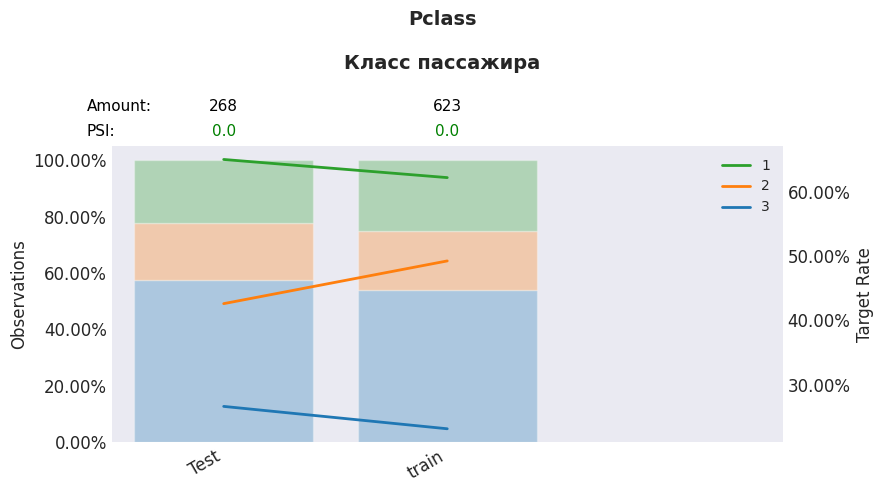

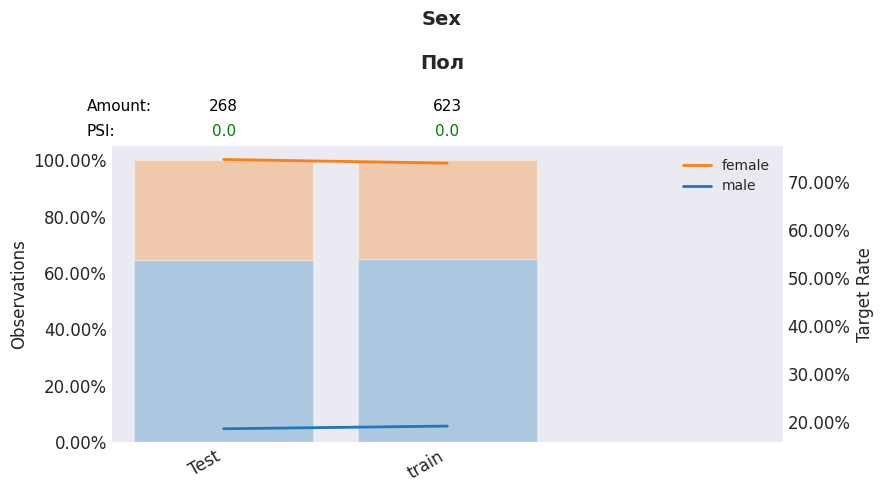

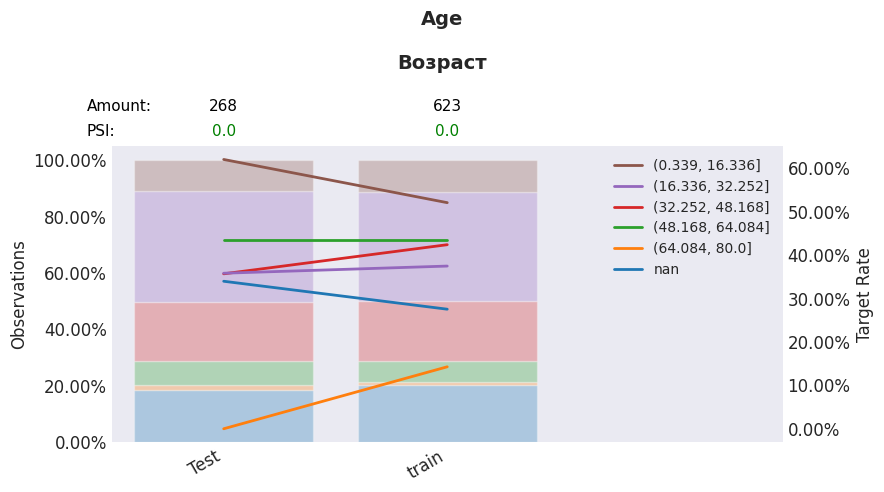

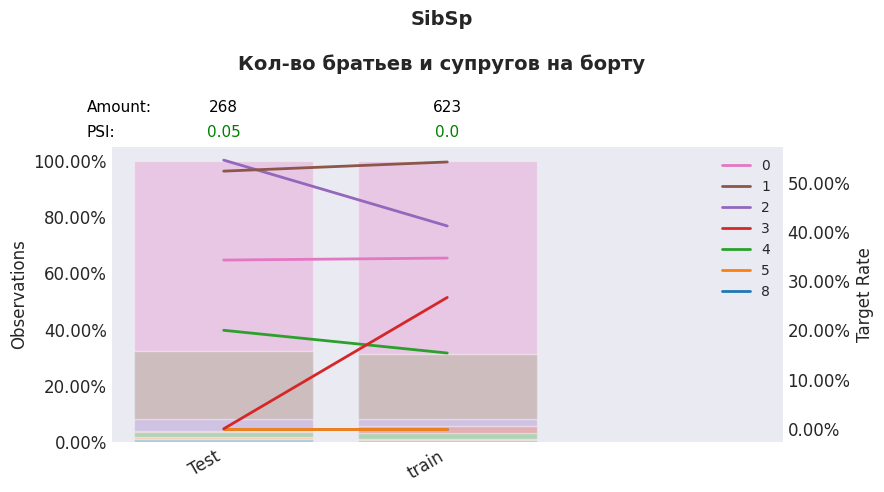

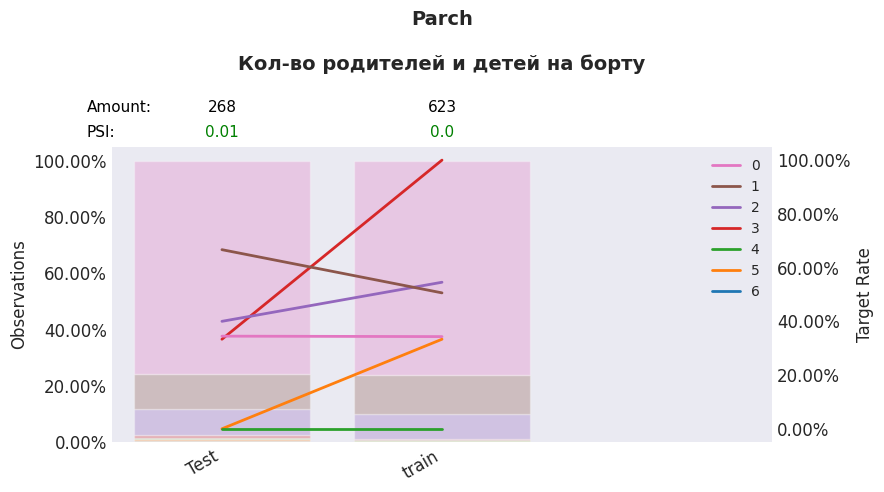

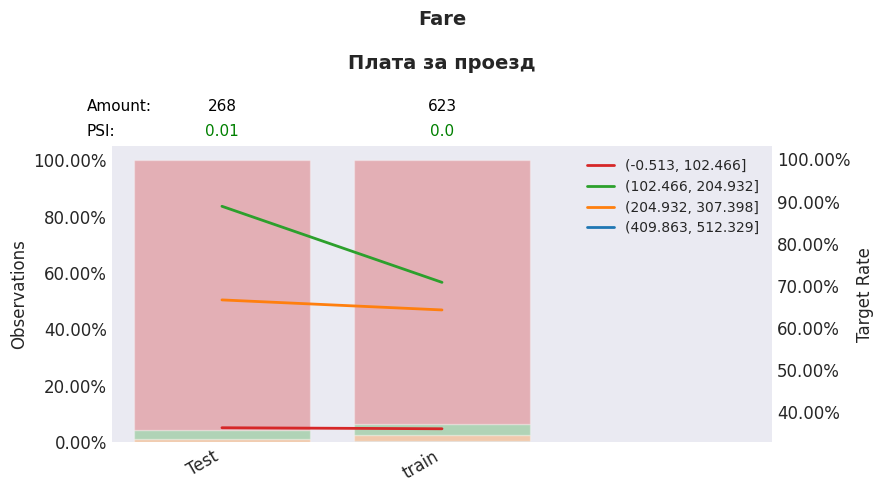

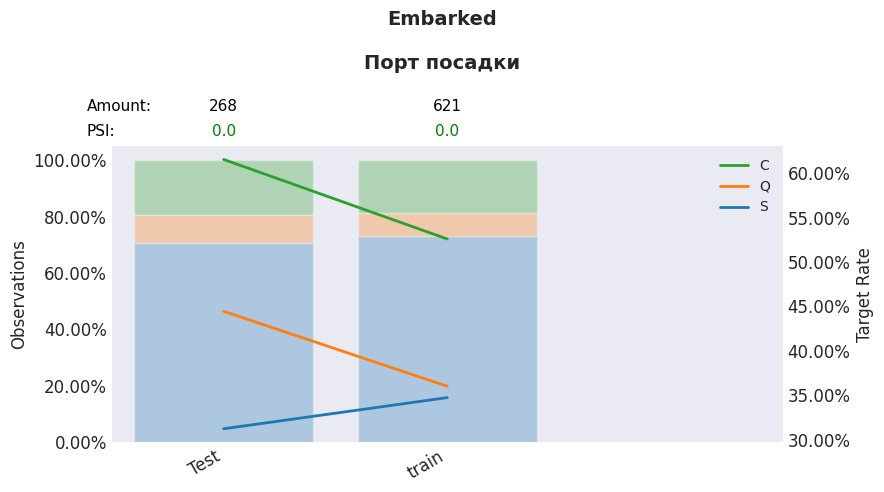

(          Test  train
 feature              
 Pclass    0.00    0.0
 Sex       0.00    0.0
 Age       0.00    0.0
 SibSp     0.05    0.0
 Parch     0.01    0.0
 Fare      0.01    0.0
 Embarked  0.00    0.0,
 [<Figure size 900x500 with 2 Axes>,
  <Figure size 900x500 with 2 Axes>,
  <Figure size 900x500 with 2 Axes>,
  <Figure size 900x500 with 2 Axes>,
  <Figure size 900x500 with 2 Axes>,
  <Figure size 900x500 with 2 Axes>,
  <Figure size 900x500 with 2 Axes>])

In [24]:
"""
Вычисление Population Stability Index
StabilityIndex[t] = (N[i, t]/sum_i(N[i, t]) - (N[i, 0]/sum_i(N[i, 0])))* log(N[i, t]/sum_i(N[i, t])/(N[i, 0]/sum_i(N[i, 0])))
где N[i, t]  - кол-во наблюдений со значением i в срезе t.

:param time_column: название поля, по которому формируются срезы. При None тест проводится между сэмплами
:param sample_name: название сэмпла, из которого берутся данные. По умолчанию self.train_name
:param features: список переменных для расчета. По умолчанию берется self.features
:param normalized: расчет доли наблюдений вместо абсолютного кол-ва
:param yellow_zone: нижняя граница желтой зоны значения PSI
:param red_zone: нижняя граница красерй зоны значения PSI
:param base_period_index: индекс основного среза в отсортированном списке значений срезов, относительного которого считается PSI остальных срезов
                            при - 1 тест для каждого среза считается относительно предыдущего
:param n_bins: кол-во бинов на которые будут разбиты значения переменных, если кол-во уникальных значений > 20
:param scorecard: датафрейм со скоркартой. Используется для добавления описания значений WOE в легенде графика PSI
:param plot_flag: флаг для вывода графиков распределений
:param styler: При True возвращается датафрейм styler, иначе датафрейм

:return: кортеж (датафрейм styler либо датафрейм,  список из графиков PSI [plt.figure])
"""
ds.psi(time_column=None, sample_name=None, features=None, normalized=True, yellow_zone=0.1, red_zone=0.25,
       base_period_index=-1, n_bins=5, scorecard=None, plot_flag=True, styler=False)        

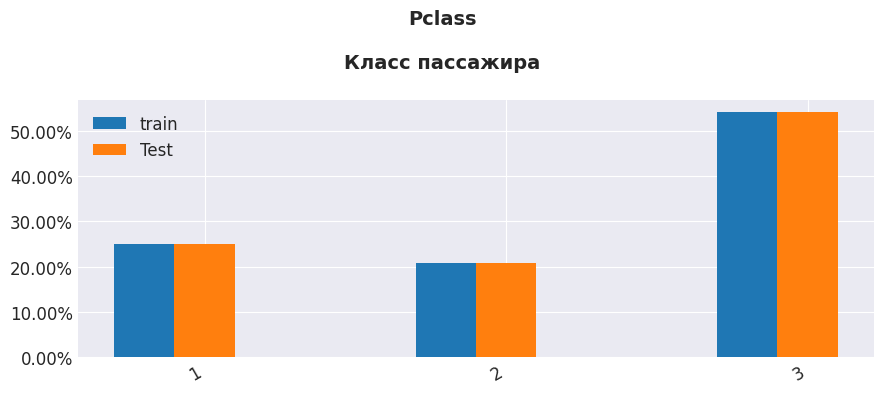

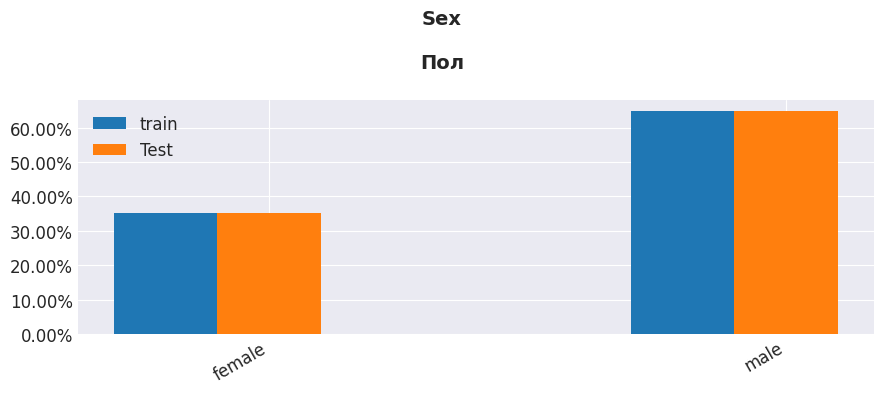

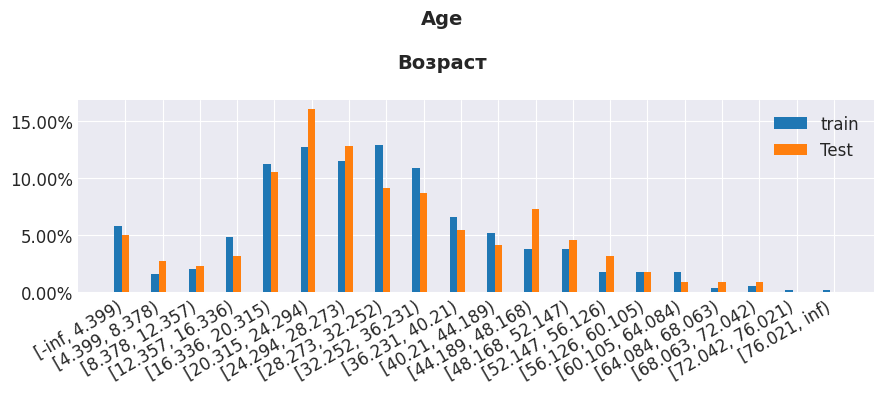

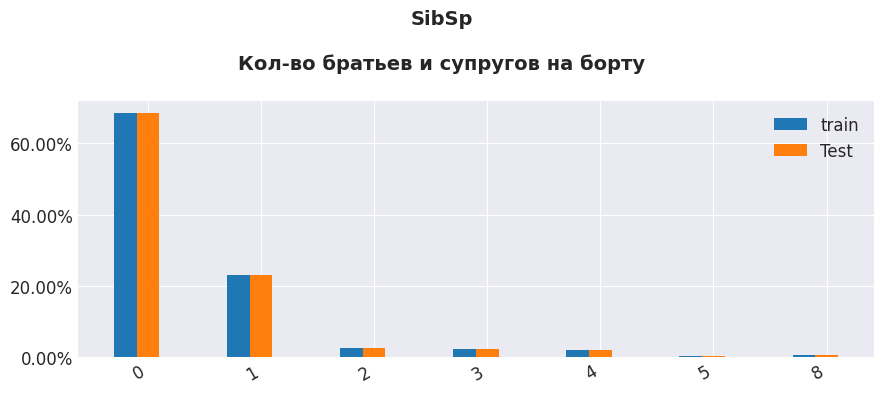

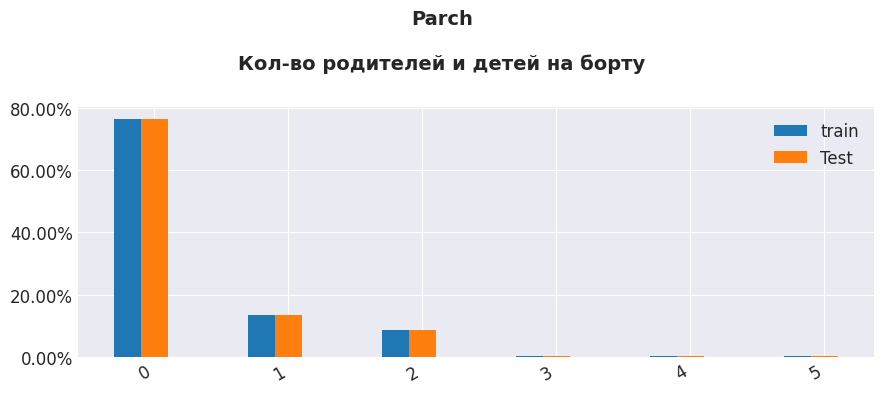

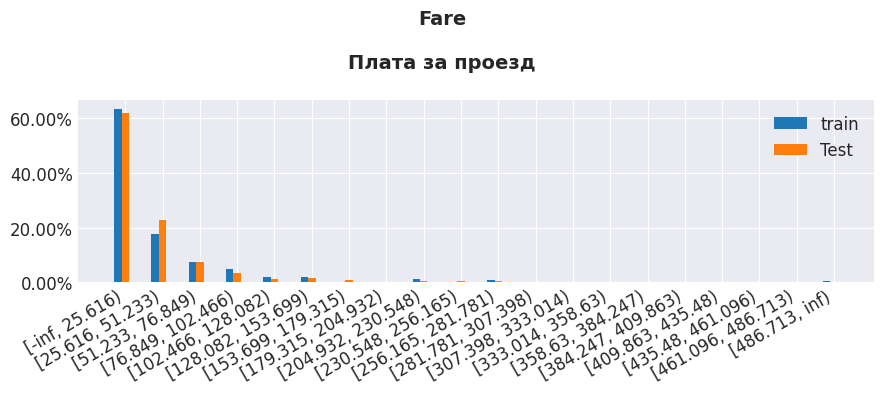

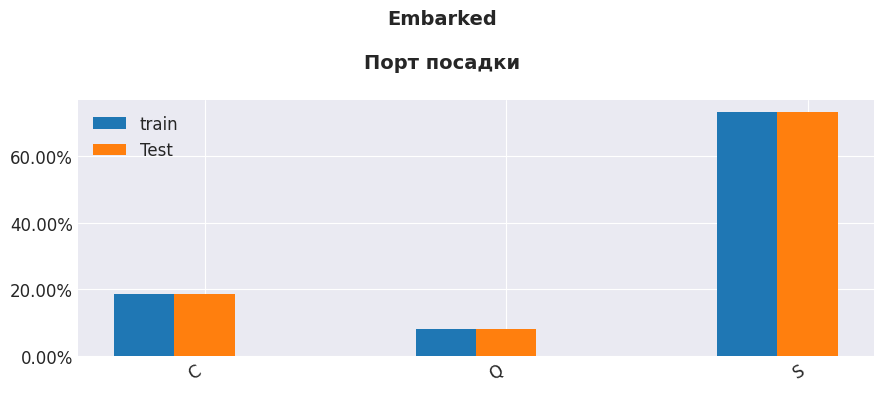

[<Figure size 900x400 with 1 Axes>,
 <Figure size 900x400 with 1 Axes>,
 <Figure size 900x400 with 1 Axes>,
 <Figure size 900x400 with 1 Axes>,
 <Figure size 900x400 with 1 Axes>,
 <Figure size 900x400 with 1 Axes>,
 <Figure size 900x400 with 1 Axes>]

In [25]:
"""
Отрисовка распределения значений переменной. Работает как с непрервными, так и дескретными переменными
:param features: список переменных для обработки
:param bins: кол-во бинов в распределении. Если в переменной число уникальных значений больше этого кол-ва, то она перебинивается
:param round_digits: кол-во знаков после запятой
:param plot_flag: флаг для вывода распределения

:return: список из графиков [plt.figure]
"""
ds.plot_distribution(features=None, bins=20, round_digits=3, plot_flag=True)

In [26]:
"""
Вычисление распределения таргета по каждой переменной из заданного списка
:param features: список переменных
:param quantiles: кол-во квантилей для разбиения непрерыных переменных
:param plot_flag: флаг для вывода распределения

:return: список из графиков [plt.figure]
"""
ds.targettrend(features=None, quantiles=100, plot_flag=False)

[<Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>,
 <Figure size 1500x500 with 2 Axes>]

In [27]:
 """
Корреляционный анализ переменных на выборке, формирование словаря переменных с причиной для исключения
:param sample_name: название сэмпла на котором проводится отбор. При None берется ds.train_sample
:param features: исходный список переменных для анализа. При None берется self.features
:param hold: список/сет переменных, которые не будут исключаться при корреляционном анализе
:param scores: словарь с метриками переменных вида {переменна: метрики}, которые будут использоваться при исключении переменных.
              При None рассчитываются однофакторные джини
:param method: метод расчета корреляций. Доступны варианты 'pearson', 'kendall', 'spearman'
:param threshold: граница по коэффициенту корреляции
:param drop_with_most_correlations:  при True - итерационно исключается фактор с наибольшим кол-вом коррелирующих с ним факторов с корреляцией выше threshold
                                     при False - итерационно исключается фактор с наименьшим значением метрики из списка коррелирующих факторов
:param verbose: флаг для вывода списка исключенных переменных

:return: словарь переменных для исключения вида {переменная: причина исключения}
"""
ds.CorrelationAnalyzer(sample_name=None, features=None, hold=None, scores=None, method='pearson', threshold=0.6, drop_with_most_correlations=True, verbose=False)

{}

In [28]:
"""
Рассчет заданной метрики для списка переменных по сэмплам
:param metric: название метрики/теста
                  'gini'    : Gini,
                  'vif'     : расчет Variance Inflation Factor,
                  'iv'      : расчет Information Value,
                  'ks'      : тест Колмогорова-Смирнова,
                  'anderson': Anderson-Darling test,
                  'chi2'    : Chisquare test,
                  'cramer'  : Cramer-Von-mises test,
                  'en_dist' : Energy distance,
                  'epps'    : Epps-Singleton test,
                  'h_dist'  : Hellinger distance,
                  'jh'      : Jensen-Shannon distance,
                  'kl'      : Kullback-Leibler divergence,
                  'mann'    : Mann-Whitney U-rank test,
                  'mmd'     : Squared euclidean pairwise distance,
                  't'       : T -test,
                  'tvd'     : Total variation distance,
                  'w_dist'  : Wasserstein distance ,
                  'z'       : Z-test
:param samples: список названий сэмплов для расчета. При None вычисляется на всех доступных сэмпплах
:param features: список переменных для расчета. При None берется self.features

:return: ДатаФрейм с индексом из списка переменных и полями samples со значениями посчитанных метрик
"""
ds.calc_metric(metric='gini', samples=None, features=None)        

,train,Test
Pclass,37.67,32.95
Sex,0.00,0.00
Age,0.00,0.00
SibSp,-8.13,-9.86
Parch,-13.06,-10.35
Fare,-39.68,-34.81
Embarked,0.00,0.00


In [29]:
"""
Оценивает стабильность биннинга переменных при различных сплитах выборки на сэмплы
:param df: полная выборка. При None в качетстве выборки берется объединение всех сэмплов
:param n: кол-во различных сплитов для теста
:param features: список переменных для обработки
:param gini_deviation: трэшхолд метрики std(gini)/mean(gini) до которого переменная считается стабильной
:param pr_good: трэшхолд доли успешных биннингов
:param exclude_features: флаг для исключения нестабильных переменных. При False будет только выведен их список
:param simple: флаг для быстрой оценки джини. При False будет выполняться полноценный СФА на каждом сплите
:param result_file: файл для сохранения результатов
"""
ds.check_split_stability(df=None, n=50, features=None, gini_deviation=0.25, pr_good=0.25, exclude_features=False,
                         simple=False, result_file='split_stability.xlsx')

[INFO] [2023-06-20 13:16:28] All features are stable!


In [30]:
"""
Выполняет биннинг переменных без проверок на стабильность и переобучение
:param X: Вектор переменных. Может иметь тип Датафрейм/Серия/массив
:param y: Вектор целевой переменной

:return: трансформированный вектор
"""
X = ds.samples[ds.train_name][['Age']]
y = ds.samples[ds.train_name][ds.target]

ds.prebinning(X, y)        

,Age
231,-0.014
836,0.343
639,0.000
389,-0.349
597,-0.136
...,...
131,0.343
490,0.000
838,-0.014
48,0.000


In [31]:
"""
Генератор переменных
Генерирует новые переменные как парные комбинации переменных из списка features используя операнды из списка operands
Для тайм-серий генерирует переменные, используя оконные функции с размером окон из списка lags с агрегирующими функциями aggs,
        и переменные с относительным изменением с лагом из списка lags
После генерации переменная добавляется в список переменных и для нее генерируется описание только в случае прохождения проверок на джини, корреляцию и стат значимость
Вся выборка должна находиться в одной сэмпле
:param features: список исходных переменных
:param prebinning: флаг для предварительного биннинга переменных перед выполнением тестов
:param chunk_size: максимальный размер пачек переменных для обработки
:param gini_threshold: граница джини, ниже которой переменные отсекаются
:param operands: список операндов для парных комбинаций. При True используется ['+', '-', '/']
:param lags: список лагов для тайм-серий. При True используется [1, 3, 6, 9, 12]
:param aggs: список агрегатов для оконных функций. При None используется ['min', 'max', 'mean', 'std']
:param corr_method: метод расчета корреляций. Доступны варианты 'pearson', 'kendall', 'spearman'
:param corr_thres: граница по коэффициенту корреляции
"""
ds = DataSamples(samples={'train': df}, target='Survived', result_folder='titanic_output')
ds.feature_generator(features=None, prebinning=True, chunk_size=10000, gini_threshold=10, operands=True,
                     lags=True, aggs=None, corr_method='spearman', corr_thres=0.80)        

[INFO] [2023-06-20 13:16:28] ---------------------------------------------------------------- Creating DataSamples ----------------------------------------------------------------
[INFO] [2023-06-20 13:16:28] Selected 8 features: ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
[INFO] [2023-06-20 13:16:28] Selected 5 categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
[INFO] [2023-06-20 13:16:28] DataSamples stats:
             train
amount         891
target         342
target_rate  0.384
period          NA
[INFO] [2023-06-20 13:16:28] Creating combinations...


100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

[INFO] [2023-06-20 13:16:29] 3 features were generated, 3 of them passed the tests and were added to sample train
